In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib
from matplotlib import patches
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
import pandas as pd

In [2]:
def formatPlotGrid(ax):
    """Helper function for formatting plot grid
    """
    ax.grid(which = "major", linewidth = 1, axis='y', ls="dotted", dashes=(.5,6), c='#414141', alpha=.5)
    ax.grid(which = "minor", linewidth = 1, axis='y', ls="dotted", dashes=(.5,6), c='white')
    ax.grid(which = "minor", linewidth = 1, axis='x', ls="dotted", dashes=(.5,6), c='#414141')
    ax.grid(which = "major", linewidth = 1, axis='x', ls="dotted", dashes=(.5,6), c='#414141')
    ax.tick_params(axis='both', labelsize=13, which='major', direction='in', top=True, right=True, bottom=True, left=True)
    ax.tick_params(axis='both', which='minor',direction='in',top=True, right=True, bottom=True, left=True)


Analytical profiles for U and V that exhibit eckman spiral

In [3]:
def U(ug, fc, km, z):
    gamma = np.sqrt(fc/(2*km))
    return ug*(1-np.exp(-1*gamma*z))*np.cos((np.pi/180)*gamma*z)

def V(ug, fc, km, z):
    gamma = np.sqrt(fc/(2*km))
    return ug*np.exp(-1*gamma*z)*np.sin((np.pi/180)*gamma*z)

I've chosen a value for the eddy viscosity such that the ekman spiral reaches geostrophy at the top of the boundary layer (i.e., matching both magnitude and direction). Also, Stull note that typical values for Km are on the order of 1-10 m^2s^-1 (pg. 206), so my chosen value $K_m = 5$ $m^2$ $s^{-1}$ falls neatly within this range

In [191]:
#z = np.logspace(1, 3.478, 100)
z = np.linspace(25, 2025, 41)
ug = 10
omega = 7.27*10**-5
phi = (30/180)*np.pi
fc = 2*omega*np.sin(phi) # coriolis param at 30 deg lat
km = 4#1.5

U_vals= U(ug, fc, km, z)
V_vals = V(ug, fc, km, z)

wind_data = pd.DataFrame({'z': z, 'U': U_vals, 'V': V_vals})

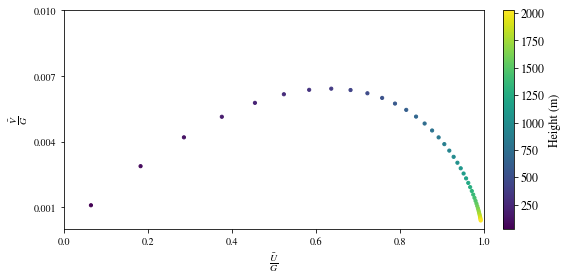

In [175]:
fig, ax = plt.subplots(1,1, figsize=(8, 4))
c = ax.scatter(U_vals/ug, V_vals/ug, c=z, s=10)

"""
#arrow_indices = np.linspace(1, 100, 5, dtype=int)
arrow_indices = np.logspace(1.7, 2, 7, dtype=int)

for i in arrow_indices:
    x_tail = 0
    y_tail = 0
    x_head = U_vals[i-1]/ug
    y_head = V_vals[i-1]/ug

    arrow = patches.FancyArrowPatch((x_tail, y_tail), (x_head, y_head),
                            #mutation_scale=100, 
                            lw=.1, facecolor='k', 
                            arrowstyle='Simple,head_width=8,head_length=8,tail_width=1.5',  # Arrow thickness
                            #transform=ax.transAxes
                            )
    #arrow.set_clip_on(False)
    ax.add_patch(arrow)
"""
cbar = fig.colorbar(c, ax=ax, orientation='vertical', fraction=0.05, pad=0.04)
cbar.set_label('Height (m)', fontsize=12)
cbar.ax.tick_params(labelsize=12)
ax.set_xlim(0, 1)
ax.set_ylim(0, 0.01)


ax.set_yticks(np.linspace(.001, .01, 4))
#ax.set_yticklabels(np.linspace(0, 2, 5).round(2))

ax.set_xlabel('$\\frac{\\bar{U}}{G}$', fontsize=14)
ax.set_ylabel('$\\frac{\\bar{V}}{G}$', fontsize=14)

#formatPlotGrid(ax)

plt.tight_layout()
#plt.savefig(f'Eckman-spiral.pdf', format='pdf')

In [166]:
grnd_data = pd.read_csv('input_sounding_base', header=None, nrows=1, names=['p', 'theta', 'q',], delim_whitespace=True)
bl_data = pd.read_csv('input_sounding_base', skiprows=1, header=None, names=['z', 'theta', 'q', 'u', 'v'], delim_whitespace=True)

Generate text for sounding profile using the wind profile specified by the Ekman spiral 

In [192]:
print(f'{grnd_data.p.values[0]:>8.2f}' + f'{grnd_data.theta.values[0]:>11.2f}' + f'{grnd_data.q.values[0]:>11.2f}')
for z_val in z:

    thetavalue = bl_data[bl_data['z'] == z_val].theta.values[0]
    qvalue = bl_data[bl_data['z'] == z_val].q.values[0]
    uvalue = wind_data[wind_data['z'] == z_val].U.values[0]
    vvalue = wind_data[wind_data['z'] == z_val].V.values[0]
    print(f'{z_val:>8.2f}' + f'{thetavalue:>11.2f}' + f'{qvalue:>11.2f}' + f'{uvalue:>11.2f}' + f'{vvalue:>11.2f}')


 1000.00     305.00      14.00
   25.00     300.00      10.00       0.73       0.01
   75.00     300.00      10.00       2.02       0.03
  125.00     300.00      10.00       3.14       0.05
  175.00     300.00      10.00       4.10       0.05
  225.00     300.00      10.00       4.92       0.06
  275.00     300.00      10.00       5.63       0.06
  325.00     300.00      10.00       6.24       0.06
  375.00     300.00      10.00       6.77       0.06
  425.00     300.00      10.00       7.22       0.06
  475.00     300.00      10.00       7.61       0.06
  525.00     300.00      10.00       7.94       0.06
  575.00     300.00      10.00       8.23       0.05
  625.00     300.00      10.00       8.48       0.05
  675.00     300.00      10.00       8.69       0.05
  725.00     300.00      10.00       8.87       0.04
  775.00     300.00      10.00       9.03       0.04
  825.00     300.00      10.00       9.16       0.04
  875.00     300.00      10.00       9.27       0.03
  925.00     30

In [3]:
data = pd.read_csv('input_sounding_windshear', skiprows=1, header=None, names=['z', 'theta', 'q', 'u', 'v'], delim_whitespace=True)

In [4]:
data_sfc = pd.read_csv('input_sounding_windshear', nrows=1, header=None, names=['p', 'theta', 'q'], delim_whitespace=True)

In [5]:
data_sfc['z'] = 0
data_sfc['u'] = 0
data_sfc['v'] = 0
full_data = pd.concat([data_sfc, data])
full_data =full_data.reset_index(drop=True)

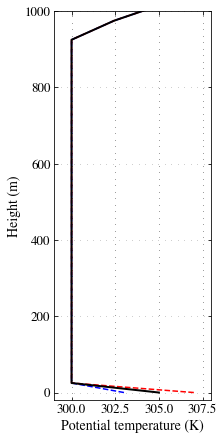

In [51]:
fig, ax = plt.subplots(1,1, figsize=(3, 6), layout='constrained')

full_data.loc[0, 'theta'] = 303
ax.plot(full_data.theta, full_data.z, c='b', ls='--')

full_data.loc[0, 'theta'] = 307
ax.plot(full_data.theta, full_data.z, c='r', ls='--')

full_data.loc[0, 'theta'] = 305
ax.plot(full_data.theta, full_data.z, c='k', lw=2)

ax.set_ylim(-20, 1000)
ax.set_xlim(299, 308)
ax.set_ylabel('Height (m)', fontsize=14)
ax.set_xlabel('Potential temperature (K)', fontsize=14)
formatPlotGrid(ax)

plt.savefig('sounding.pdf', format='pdf')

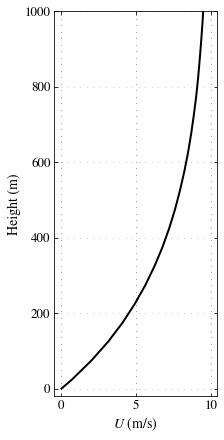

In [52]:
fig, ax = plt.subplots(1,1, figsize=(3, 6), layout='constrained')

ax.plot(full_data.u, full_data.z, c='k', lw=2)

ax.set_ylim(-20, 1000)
ax.set_ylabel('Height (m)', fontsize=14)
ax.set_xlabel('$U$ (m/s)', fontsize=14)
formatPlotGrid(ax)

plt.savefig('wind-profile.pdf', format='pdf')

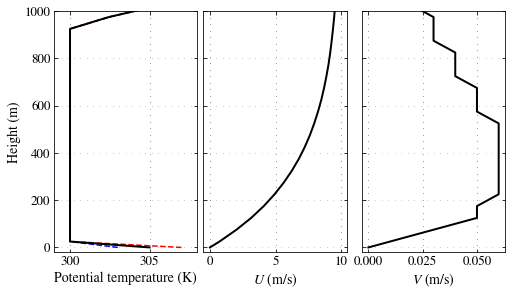

In [11]:
fig, axs = plt.subplots(1,3, figsize=(7, 4), layout='constrained', sharey=True)

full_data.loc[0, 'theta'] = 303
axs[0].plot(full_data.theta, full_data.z, c='b', ls='--')

full_data.loc[0, 'theta'] = 307
axs[0].plot(full_data.theta, full_data.z, c='r', ls='--')

full_data.loc[0, 'theta'] = 305
axs[0].plot(full_data.theta, full_data.z, c='k', lw=2)

axs[0].set_ylim(-20, 1000)
axs[0].set_xlim(299, 308)
axs[0].set_ylabel('Height (m)', fontsize=14)
axs[0].set_xlabel('Potential temperature (K)', fontsize=14)
formatPlotGrid(axs[0])

axs[1].plot(full_data.u, full_data.z, c='k', lw=2)

axs[1].set_ylim(-20, 1000)
axs[1].set_xlabel('$U$ (m/s)', fontsize=14)
formatPlotGrid(axs[1])

axs[2].plot(full_data.v, full_data.z, c='k', lw=2)

axs[2].set_ylim(-20, 1000)
axs[2].set_xlabel('$V$ (m/s)', fontsize=14)
formatPlotGrid(axs[2])

plt.savefig('paper-sounding-profiles.pdf', format='pdf')